In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv("train_values.csv")  # Features for training
y_train = pd.read_csv("train_labels.csv")  # Labels for training
X_test = pd.read_csv("test_values.csv")    # Features for testing

In [3]:
X = X_train  # Features for training
y = y_train  # Labels for training
test_data = X_test  # Features for testing

In [4]:
x_prac = X
y_prac = y

In [5]:
x_prac.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_prac.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
test_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [9]:
# encoding train data
categorical_cols = x_prac.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')


In [10]:
x_prac = pd.get_dummies(x_prac, columns=categorical_cols, drop_first=True).astype(int)

In [11]:
# encoding test data
categorical_cols_test_data= test_data.select_dtypes(include=['object']).columns
print(categorical_cols_test_data)

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')


In [12]:
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True).astype(int)

In [13]:
# standardizing traina and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(x_prac)

In [15]:
X_test_scaled = scaler.transform(test_data)

In [16]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=x_prac.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_data.columns)

In [17]:
X_train_scaled_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0.910312,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
1,-1.631438,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
2,-1.414337,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
3,0.214112,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
4,-1.063003,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,3.206391,-1.789003,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.535096,1.381653,1.536007,-1.271644,-1.552536,0.386932,-0.459460,-1.268946,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,6.692065,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
260597,0.472212,0.385835,0.033741,-1.151250,-0.178274,-0.360698,-0.459460,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
260598,0.252300,0.385835,-1.575137,0.522472,1.195989,0.386932,-0.459460,0.816109,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
260599,-1.228939,1.506130,-1.604213,-1.208568,-0.178274,-0.224765,1.361941,0.294845,-0.311877,-1.789003,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878


In [18]:
X_test_scaled_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,-0.740859,0.385835,-0.254597,1.384702,1.195989,-0.088832,-0.231785,0.294845,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
1,-1.399863,-0.983414,-1.357066,1.571189,-0.178274,-0.020866,1.134266,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
2,1.197118,1.008221,-1.652673,1.038329,-0.178274,-0.292732,-0.914810,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
3,0.722855,1.506130,-1.604213,-1.542599,-1.552536,-0.360698,2.500317,-1.268946,-0.311877,-1.789003,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
4,-0.341108,0.385835,-0.998461,0.469543,1.195989,-0.156799,-0.004110,0.816109,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,-0.708099,-1.232368,-0.232790,-0.722604,1.195989,0.590831,2.727992,0.294845,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,-5.096248,9.815709
86864,0.452780,-0.485505,1.710464,1.549249,1.195989,-0.020866,-0.459460,0.816109,3.206391,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
86865,1.718910,1.008221,1.053828,0.398788,-1.552536,0.318966,-1.142486,-1.268946,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
86866,-0.272179,-0.983414,0.823642,-1.466085,-0.178274,-0.292732,0.223565,-0.226419,3.206391,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,-5.096248,-0.101878


In [19]:
y_prac = y_prac.drop(columns=["building_id"])

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_prac)

e:\chrome download\python\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_scaled_df, y_encoded, test_size=0.2, random_state=42, stratify=y_prac
)

In [55]:
import numpy as np

unique_labels, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count}")

Label 0: 20099
Label 1: 118607
Label 2: 69774


In [22]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='mlogloss',  # For multiclass classification, or use 'logloss' for binary
    use_label_encoder=False,  # Suppress warnings
    early_stopping_rounds=50
)

In [24]:
xgb_model.fit(
    X_train_smote, y_train_smote.squeeze(),  # squeeze() converts (n,1) → (n,)
    eval_set=[(X_test, y_test)],
    verbose=100
)

[0]	validation_0-mlogloss:1.06505


e:\chrome download\python\lib\site-packages\xgboost\callback.py:386: UserWarning: [11:22:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[100]	validation_0-mlogloss:0.68979
[200]	validation_0-mlogloss:0.65714
[300]	validation_0-mlogloss:0.63756
[400]	validation_0-mlogloss:0.62627
[500]	validation_0-mlogloss:0.61784
[600]	validation_0-mlogloss:0.61230
[700]	validation_0-mlogloss:0.60743
[800]	validation_0-mlogloss:0.60287
[900]	validation_0-mlogloss:0.59940
[999]	validation_0-mlogloss:0.59741


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [25]:
y_pred = xgb_model.predict(X_test)

In [26]:
y_pred_original = le.inverse_transform(y_pred)

In [27]:
y_test_original = le.inverse_transform(y_test)

In [28]:
print("F1 Score (micro):", f1_score(y_test_original, y_pred_original, average='micro'))

F1 Score (micro): 0.73553845858675


In [29]:
y_test_pred = xgb_model.predict(X_test_scaled_df)

In [30]:
y_test_pred_ORIGINAL = le.inverse_transform(y_test_pred)

In [31]:
from collections import Counter
counts = Counter(y_test_pred_ORIGINAL)

print(counts)

Counter({2: 55530, 3: 24607, 1: 6731})


In [32]:
building_ids = test_data['building_id']

In [ ]:
submission_6 = pd.DataFrame({
    'building_id': building_ids,
    'damage_grade': y_test_pred_ORIGINAL.ravel().astype(int)  # Flatten to 1D and convert to int
})

In [ ]:
submission_6.to_csv('6_damage_grade_predictions.csv', index=False)

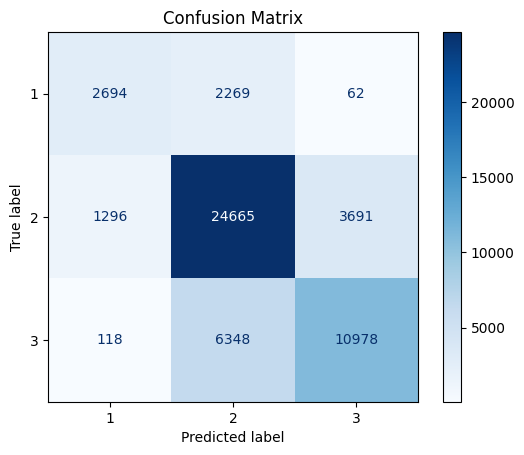

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np  
# Unique labels in correct order (e.g., 1, 2, 3)
labels = sorted(np.unique(y_test_original))

# Compute confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original, labels=labels)

# Display with correct labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


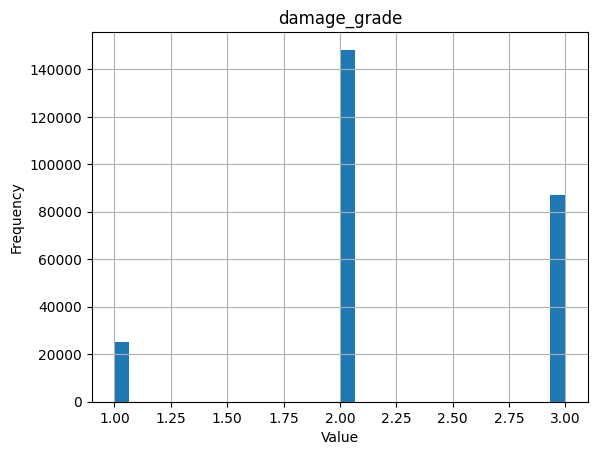

In [42]:
y["damage_grade"].hist(bins=30)
plt.title("damage_grade")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [49]:
damage_g = le.inverse_transform(y_train_smote)

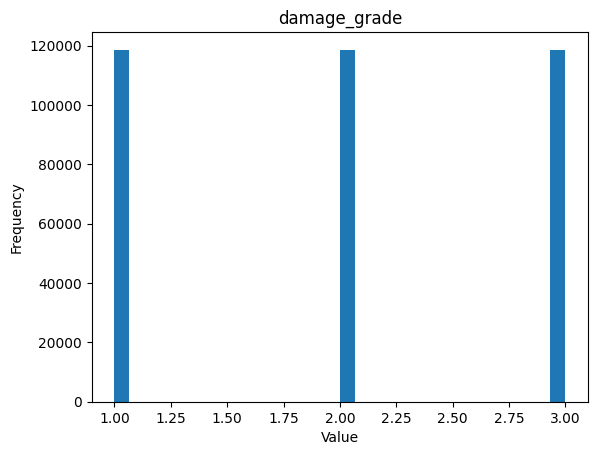

In [53]:
plt.hist(damage_g, bins=30)
plt.title("damage_grade")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()